<a href="https://colab.research.google.com/github/wahyunh10/Project-K-Means-from-Scratch/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import math
import random
import string
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Read Data**

In [2]:
df_mall = pd.read_csv('Mall_Customers.csv')
pd.set_option('display.max_rows', None)
df_mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df_mall['Genre'] = df_mall[['Genre']].replace(['Male', 'Female'], [0, 1])
df_mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


# **Functions and Procedures**

In [4]:
def euclidean(x, y):
    d = math.sqrt(sum((x - y)**2))
    return d

In [5]:
def kmeans(k, max_iter, df):
    
    centroid = {}
    
    for c in range(k):
        ran = random.randint(0, len(df))
        centroid[c] = df[ran]
#         print(centroid)
        
#     df.to_numpy()
#     np.diff(df)

    for it in range(max_iter):
        cluster = {}
        
        for i in range(k):
            cluster[i] = []
            
        for x in df:
            
#             dist = []
#             for c in centroid:
#                 d = euclidean(x, centroid[c])
#                 dist.append(d)
#                 min_dist = min(dist)
#                 min_dist_idx = dist.index(min_dist)
#                 cluster[min_dist_idx].append(x)
            
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)
            
        prev_centroid = dict(centroid)
            
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis = 0)

        for c in centroid:
            old_centroid = prev_centroid[c]
            curr_centroid = centroid[c]

    return centroid, cluster

# **Tuning Hyperparameters**

In [6]:
k = 5
max_iter = 1000

In [11]:
centroid, cluster = kmeans(k, max_iter, data)

# **Main**

In [10]:
data = (df_mall.iloc[:, 1:]).to_numpy()

In [12]:
df = []
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], c[2], c[3], key))
            
# Convert to dataframe
df = pd.DataFrame(df)
df.columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,1,20,16,6,0
2,1,31,17,40,0
3,1,35,18,6,0
4,0,64,19,3,0
5,0,67,19,14,0
6,1,58,20,15,0
7,0,37,20,13,0
8,1,35,21,35,0
9,0,52,23,29,0


In [13]:
for i in range(k):
    print('Centroid', i + 1, ':', centroid[i])

Centroid 1 : [ 0.60869565 45.2173913  26.30434783 20.91304348]
Centroid 2 : [ 0.53846154 32.69230769 86.53846154 82.12820513]
Centroid 3 : [ 0.59210526 43.93421053 55.21052632 49.44736842]
Centroid 4 : [ 0.56 24.96 28.04 77.  ]
Centroid 5 : [ 0.48648649 40.32432432 87.43243243 18.18918919]


In [14]:
test = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster.items() ]))

col = []
for i in range(len(test.columns)):
    col.append('Cluster ' + str(i + 1))

test.columns = col
test

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,"[0, 19, 15, 39]","[0, 39, 69, 91]","[1, 50, 40, 55]","[0, 21, 15, 81]","[1, 23, 70, 29]"
1,"[1, 20, 16, 6]","[1, 31, 70, 77]","[1, 27, 40, 47]","[1, 23, 16, 77]","[0, 59, 71, 11]"
2,"[1, 31, 17, 40]","[0, 40, 71, 95]","[1, 29, 40, 42]","[1, 22, 17, 76]","[0, 47, 71, 9]"
3,"[1, 35, 18, 6]","[0, 38, 71, 75]","[1, 31, 40, 42]","[1, 23, 18, 94]","[1, 25, 72, 34]"
4,"[0, 64, 19, 3]","[0, 39, 71, 75]","[1, 49, 42, 52]","[1, 30, 19, 72]","[0, 20, 73, 5]"
5,"[0, 67, 19, 14]","[1, 31, 72, 71]","[0, 33, 42, 60]","[1, 35, 19, 99]","[1, 44, 73, 7]"
6,"[1, 58, 20, 15]","[1, 29, 73, 88]","[1, 31, 43, 54]","[1, 24, 20, 77]","[0, 19, 74, 10]"
7,"[0, 37, 20, 13]","[0, 32, 73, 73]","[0, 59, 43, 60]","[0, 22, 20, 79]","[1, 57, 75, 5]"
8,"[1, 35, 21, 35]","[1, 35, 74, 72]","[1, 50, 43, 45]","[0, 20, 21, 66]","[1, 28, 76, 40]"
9,"[0, 52, 23, 29]","[0, 32, 75, 93]","[0, 47, 43, 41]","[1, 35, 23, 98]","[0, 25, 77, 12]"


# **Plot**

<function matplotlib.pyplot.show>

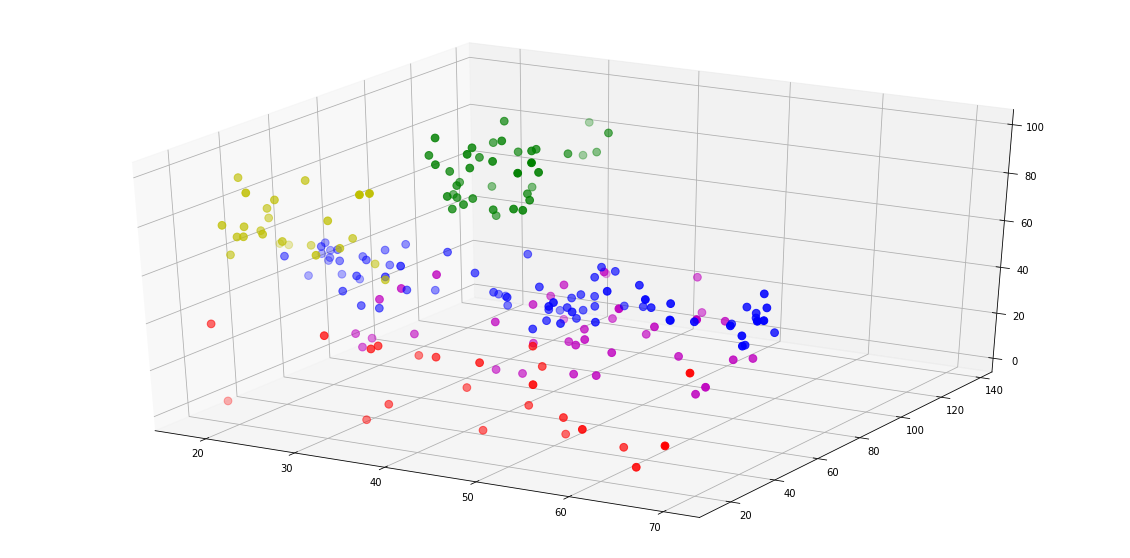

In [15]:
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'darkcyan', 'olivedrab', 'honeydew', 'lime']

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    ax.scatter(
        df.Age[df['Cluster'] == i], 
        df['Annual Income (k$)'][df['Cluster'] == i], 
        df['Spending Score (1-100)'][df['Cluster'] == i], 
        c=colors[i], s=60
    )
    
plt.show